# Final P7: Predictive ML Project
# Agnes Mrutu
```
https://github.com/amrutu75/datafun-07-project
```
There are 5 sections in this final part of module 7
1. Charting a straight line
2. Prediction of average high temperature in NYC in January (a)
3. Prediction of average high temperature in NYC in January (b)
4. Insights 
5. Optional bonus

In [187]:
# Data Analytics and Cumputational Thinking

import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Statistical Analysis
from scipy.stats import linregress



### Part 1. Charting a straight Line (Chapter 10.16)
Using DataFrames to plot Celcius from given Fahrenheit

y = mx + b  
c = 5/9 * (f - 32) 

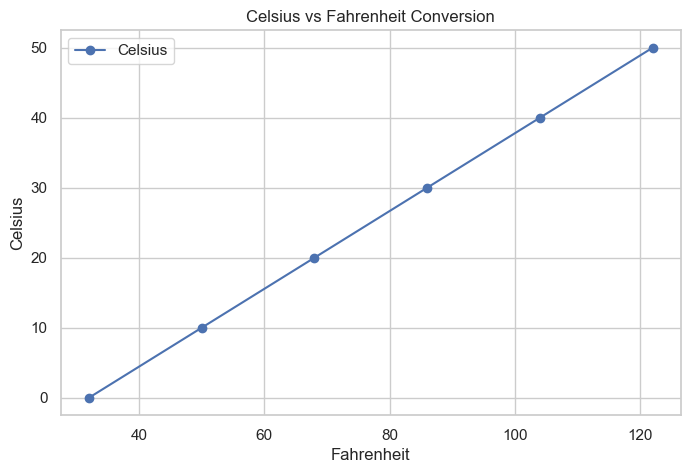

In [188]:
# Import pandas
import pandas as pd

# defineFahrenheit to Celsius conversion function
f = lambda f: (f - 32) * 5.0/9.0

# Example dataset
temp = [
    (32, 0),
    (50, 10),
    (68, 20),
    (86, 30),
    (104, 40),
    (122, 50)
]

# Create DataFrame
temps_df = pd.DataFrame(temp, columns=['Fahrenheit', 'Celsius'])

# Plot Fahrenheit vs Celsius
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='o-', figsize=(8,5))
y_label = axes.set_ylabel('Celsius')
axes.set_xlabel('Fahrenheit')
axes.set_title('Celsius vs Fahrenheit Conversion')

# Show plot
import matplotlib.pyplot as plt
plt.show()


### Part 2. Prediction 
This subsection will deal with data acquisation, data inspection, data cleaning, descriptive statistics, build the model using Scipy, prediction and data visualization.

Section 1. Data Acquisation



In [186]:
# Import required packages
import pandas as pd

# Correct data path
DATA_PATH = "examples/ch10/ave_hi_nyc_jan_1895-2018.csv"
DATA_PATH = r"C:\Repos\datafun-07-project\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv"

# Make plots look clean and modern
sns.set(style="whitegrid")

# Load dataset to test
nyc = pd.read_csv(DATA_PATH)
nyc.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


Section 2.  Data Inspection

In [144]:
print(nyc.head(20))    # Show first 20 rows
print(nyc.tail(3))     # Show last 3 rows
print(nyc.dtypes)      # Show data types of each column
print(nyc.info())      # Show summary info about the DataFrame



      Date  Value  Anomaly
0   189501   34.2     -3.2
1   189601   34.7     -2.7
2   189701   35.5     -1.9
3   189801   39.6      2.2
4   189901   36.4     -1.0
5   190001   37.4      0.0
6   190101   37.0     -0.4
7   190201   35.0     -2.4
8   190301   35.5     -1.9
9   190401   29.8     -7.6
10  190501   33.7     -3.7
11  190601   42.3      4.9
12  190701   40.5      3.1
13  190801   38.3      0.9
14  190901   39.6      2.2
15  191001   36.1     -1.3
16  191101   40.7      3.3
17  191201   29.3     -8.1
18  191301   46.9      9.5
19  191401   36.9     -0.5
       Date  Value  Anomaly
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3
Date         int64
Value      float64
Anomaly    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    fl

Section 3. Data Cleaning

In [157]:
# ----------------------------------
# Clean column names
# ----------------------------------
nyc.columns = nyc.columns.str.strip()
nyc.columns = ['Date', 'Fahrenheit', 'Anomaly']

# ----------------------------------
# Filter unrealistic Fahrenheit temperatures
# ----------------------------------
nyc = nyc[(nyc['Fahrenheit'] >= -50) & (nyc['Fahrenheit'] <= 150)]

# ----------------------------------
# Reset index after filtering
# ----------------------------------
nyc.reset_index(drop=True, inplace=True)

# ----------------------------------
# Verify filtered DataFrame
# ----------------------------------
print(nyc.head())
print(nyc.info())


     Date  Fahrenheit  Anomaly
0  189501        34.2     -3.2
1  189601        34.7     -2.7
2  189701        35.5     -1.9
3  189801        39.6      2.2
4  189901        36.4     -1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        124 non-null    int64  
 1   Fahrenheit  124 non-null    float64
 2   Anomaly     124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB
None


Section 4. Descriptive Statistics


In [146]:
# ----------------------------------
# Display descriptive statistics
# ----------------------------------
print(nyc.describe())


                Date  Fahrenheit     Anomaly
count     124.000000  124.000000  124.000000
mean   195651.000000   37.595161    0.195161
std      3593.976442    4.539848    4.539848
min    189501.000000   26.100000  -11.300000
25%    192576.000000   34.575000   -2.825000
50%    195651.000000   37.600000    0.200000
75%    198726.000000   40.600000    3.200000
max    201801.000000   47.600000   10.200000


In [147]:
# ----------------------------------
# Display descriptive statistics
# ----------------------------------
display(nyc.describe())


,Date,Fahrenheit,Anomaly
count,124.000000,124.000000,124.000000
mean,195651.000000,37.595161,0.195161
std,3593.976442,4.539848,4.539848
min,189501.000000,26.100000,-11.300000
25%,192576.000000,34.575000,-2.825000
50%,195651.000000,37.600000,0.200000
75%,198726.000000,40.600000,3.200000
max,201801.000000,47.600000,10.200000


Section 5. Build the model

In [ ]:
# ----------------------------------
# Import required packages
# ----------------------------------
import pandas as pd
from scipy.stats import linregress

# ----------------------------------
# Load dataset
# ----------------------------------
file_path = r"C:\Repos\datafun-07-project\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv"
nyc = pd.read_csv(file_path)

# ----------------------------------
# Clean column names
# ----------------------------------
nyc.columns = nyc.columns.str.strip()
nyc.columns = ['Date', 'Fahrenheit', 'Anomaly']

# ----------------------------------
# Calculate slope and intercept using SciPy linregress
# ----------------------------------
x = nyc['Date'].values
y = nyc['Fahrenheit'].values

slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"\nLinear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"\nLine: y = {slope:.6f} * x + {intercept:.6f}")
print(f"r (corr): {r_value:.4f}")




Linear Regression Results:
Slope: 0.0001
Intercept: 8.69

Line: y = 0.000148 * x + 8.694846
r (corr): 0.1169


Section 6. Prediction

Using the model to predict the "average high temp in Jan" for the year 2024 

In [182]:
# Predict average high temp for 2024
m = slope
b = intercept
year_to_predict = 2024
pred_2024 = m * year_to_predict + b
print(f"Predicted NYC Jan average high for {year_to_predict}: {pred_2024:.2f} °F")


Predicted NYC Jan average high for 2024: 8.99 °F


Section 7. Visualization

Set the axes, y axis = temperature in degrees F versus X axis = years and I used Seaborn to generate a scatter plot with a best fit line
Also, checked slope and predicted temp value, resonably at 38.6 F.


Linear Regression Results:
Slope: 0.0148
Intercept: 8.69
R-squared: 0.0137
Std Error: 0.0114

Predicted Average January High Temp for 2024: 38.59°F


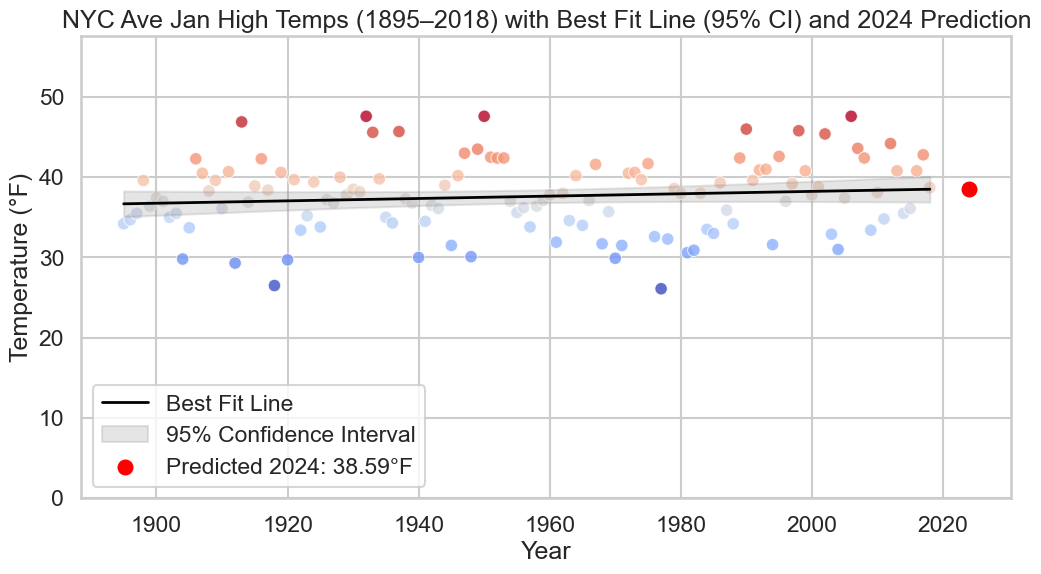

In [150]:
# ----------------------------------
# Import required packages
# ----------------------------------
import pandas as pd
import numpy as np
from scipy.stats import linregress, t
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------
# Load dataset
# ----------------------------------
file_path = r"C:\Repos\datafun-07-project\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv"
nyc = pd.read_csv(file_path)

# ----------------------------------
# Clean column names
# ----------------------------------
nyc.columns = nyc.columns.str.strip()
nyc.columns = ['Date', 'Fahrenheit', 'Anomaly']

# Extract year from YYYYMM format
nyc['Year'] = nyc['Date'] // 100

# ----------------------------------
# Linear regression
# ----------------------------------
slope, intercept, r_value, p_value, std_err = linregress(nyc['Year'], nyc['Fahrenheit'])

print(f"\nLinear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"Std Error: {std_err:.4f}")

# ----------------------------------
# Predict 2024 temperature
# ----------------------------------
year_pred = 2024
predicted_temp = slope * year_pred + intercept
print(f"\nPredicted Average January High Temp for {year_pred}: {predicted_temp:.2f}°F")

# ----------------------------------
# Calculate confidence intervals for regression line
# ----------------------------------
x_vals = np.linspace(nyc['Year'].min(), nyc['Year'].max(), 100)
y_vals = slope * x_vals + intercept

n = len(nyc)
x_mean = np.mean(nyc['Year'])
se_y = np.sqrt(np.sum((nyc['Fahrenheit'] - (slope * nyc['Year'] + intercept)) ** 2) / (n - 2))
t_val = t.ppf(0.975, n - 2)  # 95% confidence

# Confidence interval for regression prediction
conf_interval = t_val * se_y * np.sqrt(1/n + ((x_vals - x_mean)**2 / np.sum((nyc['Year'] - x_mean)**2)))
y_upper = y_vals + conf_interval
y_lower = y_vals - conf_interval

# ----------------------------------
# Plot data + regression + confidence limits
# ----------------------------------
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=nyc,
    x="Year",
    y="Fahrenheit",
    hue="Fahrenheit",
    palette="coolwarm",
    legend=False,
    alpha=0.8
)

# Best fit line
plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Best Fit Line")

# Confidence band
plt.fill_between(x_vals, y_lower, y_upper, color="gray", alpha=0.2, label="95% Confidence Interval")

# Highlight 2024 prediction
plt.scatter(year_pred, predicted_temp, color="red", s=100, zorder=5, label=f"Predicted 2024: {predicted_temp:.2f}°F")

# Titles and labels
plt.title("NYC Ave Jan High Temps (1895–2018) with Best Fit Line (95% CI) and 2024 Prediction")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.ylim(0, nyc['Fahrenheit'].max() + 10)
plt.legend()
plt.show()



### Part 3. Prediction of NYC Jan Avg High Temp Using Machine Learning

In this section, Linear regression will be used to predict average high temeperatures in NYC in January 2024 using machine Learning approach (Scikit-Learn's Linear Regression)

Section 1 -- Build the Model
1. Used test_train_split to split the data into parts for training and testing.
2. Trained the model using Linear Regression Fit. 
3. View the returned coef_ and intercept_  attributes need for the line equation (y = mx + b)

In [163]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load dataset
DATA_PATH = r"C:\Repos\datafun-07-project\IntroToPython\examples\ch15\ave_hi_nyc_jan_1895-2018.csv"
df = pd.read_csv(DATA_PATH)

# Check actual column names
print("Columns in CSV:", df.columns.tolist())

# Rename columns if necessary
df.columns = ['Date', 'Temperature', 'Anomaly']

# Convert Date to Year correctly
# Handles YYYY or YYYYMM format
df['Year'] = df['Date'].astype(str).str[:4].astype(int)

# Drop any invalid entries
df = df.dropna(subset=['Year', 'Temperature'])

# Define Features (X) and target (Y)
X = df['Year'].values.reshape(-1, 1)
y = df['Temperature'].values

#Split into Train and test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


# Build and train the model
model = LinearRegression()
model.fit (X_train, y_train)

print(f"Model Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")

Columns in CSV: ['Date', 'Value', 'Anomaly']
Model Coefficient (slope): 0.0194
Model Intercept: -0.3078


Section 2. Testing the Model

Testing the model to predict temps on the test data

In [152]:
# Testing the model to predict temps on the test data
y_pred = model.predict(X_test)

# Display predictions vs actuals
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))  # Show first 10 predictions vs actuals

   Actual  Predicted
0    31.7  37.855015
1    35.5  36.478206
2    40.5  37.932582
3    29.8  36.613948
4    40.7  36.749689
5    34.8  38.688857
6    34.2  36.439423
7    38.2  37.137523
8    36.2  37.622315
9    42.5  37.525356


Section 3. Prediction 

Used the model to predict the "average high temp in Jan" for the year 2024

In [164]:
# Predict the average January high temperature for 2024
pred_2024 = model.predict([[2024]])
print(f"Predicted Average High Temp for January 2024: {pred_2024[0]:.2f} °F")

Predicted Average High Temp for January 2024: 38.94 °F


Section 3 and 4. Prediction and Visualization

Predicted NYC January 2024 Temperature (Linear Regression): 38.94 °F


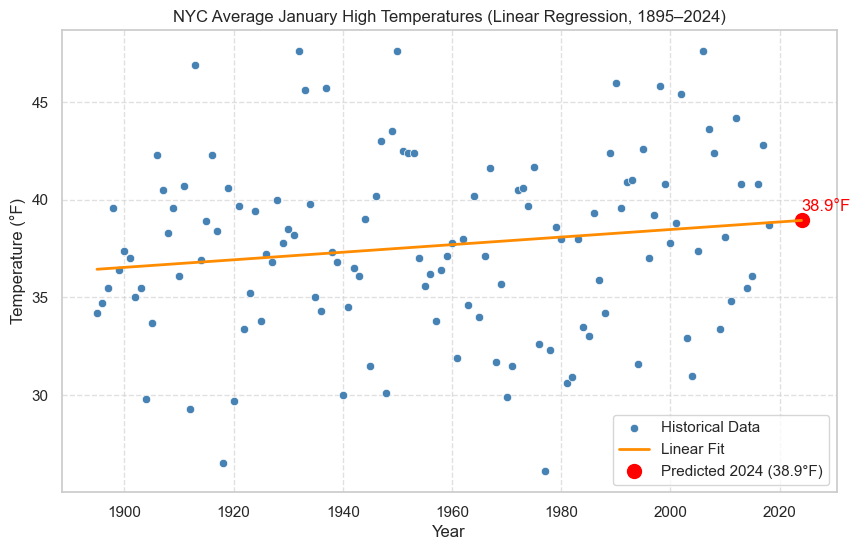

In [165]:
# Predict historical and future values (up to 2024)
X_future = np.arange(df['Year'].min(), 2025).reshape(-1, 1)  # up to 2024
y_future = model.predict(X_future)

# Predict January 2024
pred_2024 = model.predict([[2024]])[0]
print(f"Predicted NYC January 2024 Temperature (Linear Regression): {pred_2024:.2f} °F")

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot of historical data
sns.scatterplot(x='Year', y='Temperature', data=df, color='steelblue', label='Historical Data')

# Linear regression line
plt.plot(X_future.flatten(), y_future, color='darkorange', linewidth=2, label='Linear Fit')

# Highlight 2024 prediction
plt.scatter(2024, pred_2024, color='red', s=100, label=f'Predicted 2024 ({pred_2024:.1f}°F)')
plt.text(2024, pred_2024 + 0.5, f"{pred_2024:.1f}°F", color='red')

# Titles, labels, legend, and grid
plt.title('NYC Average January High Temperatures (Linear Regression, 1895–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Section 5. Model Equation

The regression line equation :
y = mx + b

where:
    y = predicted temperature
    x = the input year
    m = the slope
    b = the intercept

In [172]:
# Display the model equation
m = model.coef_
b = model.intercept_

# Build equation string dynamically
if len(m) == 1:
    print(f"The regression line equation: Temperature = {m[0]:.4f} * Year + {b:.4f}")
else:
    terms = " + ".join([f"{coef:.4f} * x{i}" for i, coef in enumerate(m)])
    print(f"The regression equation: Temperature = {terms} + {b:.4f}")

# Manual calculation for 2024
manual_pred_2024 = sum(coef * val for coef, val in zip(m, [2024])) + b
print(f"Manual calculation for 2024 prediction: {manual_pred_2024:.2f} °F")

# Model prediction for 2024
pred_2024 = model.predict([[2024]])
print(f"Model prediction for 2024: {pred_2024[0]:.2f} °F")


The regression line equation: Temperature = 0.0194 * Year + -0.3078
Manual calculation for 2024 prediction: 38.94 °F
Model prediction for 2024: 38.94 °F


### Part 4. Insights

TTwo predictive models were employed to estimate January temperatures in New York City. The first model utilized a simple linear regression approach (as discussed in Chapter 10), while the second applied a machine learning–based predictive linear regression model developed using Scikit-Learn (as discussed in Chapter 15).

The predicted average high January temperatures generated by the two models were remarkably similar: 38.59°F for the simple regression model and 38.94°F for the Scikit-Learn–based model. Visualization of the results from both approaches indicates a gradual upward trend in NYC temperatures over time, providing evidence that the city is experiencing the effects of global warming.

Most importantly, this analysis highlights the power and versatility of data analytics in predicting not only temperature trends but also a wide range of other phenomena, thereby supporting data-driven and informed decision-making.